<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: ACT vs. SAT: Which test should you take?

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Whether a student should concentrate on the ACT or the SAT is one of the frequently asked questions an experienced ACT and SAT has encountered. Although colleges claim to treat both tests equally, is that really the case?

High school students are most concerned about their university entrance exam. They tend to rely on their advisor to choose focusing on either SAT or ACT score. In this project, the advisor studied SAT and ACT score requirements and predicted the relationship between university accept rate and test scores. Moreover, the difference in accept rate among universities was also studied.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

They have different score ranges, which you can read more about on their websites or additional outside sources.
* [SAT](https://collegereadiness.collegeboard.org/sat) has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)).
* [ACT](https://www.act.org/content/act/en.html) has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)).

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### My Data for analysis
* [`act_2019.csv`](../data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](../data/sat_2019.csv): 2019 SAT Scores by State
* [`SAT_to_ACT_Conversion_Chart.csv`](../data/SAT_to_ACT_Conversion_Chart.csv): SAT to ACT Conversion Chart
* [`sat_act_by_college.csv`](../data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges
* [`cwuData.csv`](../data/cwuData.csv): World University Rankings

### Outside Research

Contributed the following information or resources to the project:

* https://www.kaggle.com/datasets/mylesoneill/world-university-rankings : World University Rankings

* https://www.studypoint.com/ed/sat-act-concordance/ : SAT to ACT Conversion Chart: Convert Your SAT Scores to ACT Scores
* https://www.collegefinancinggroup.com/choosing-a-college/act-vs-sat-test-right/ : ACT vs. SAT: Which test should you take?
* https://www.goodschoolsguide.co.uk/university/usa/the-sat-and-act-and-tips-for-taking-them : The SAT and ACT - and tips for taking them

### Coding Challenges

1. Manually calculate mean:

In [1]:
# Create function to find mean values
def cal_mean(numbers):
    '''
    Return mean of numbers
    '''
    return float(sum(numbers)) / (len(numbers))  

In [2]:
# Check function
numbers = [1 , 2, 3, 4, 5]
cal_mean(numbers)

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation(population) is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [3]:
# Create function to find standard deviation of numbers 
def cal_std(numbers):
    '''
    Return standard deviation(population) of numbers
    '''
    sum_x = 0
    for i in numbers:
        sum_x += (i - cal_mean(numbers))**2
    return ((1/len(numbers))*sum_x)**(1/2)

In [4]:
# Check function
numbers = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4]
cal_std(numbers)

2.9832867780352594

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Create function to convert number and a percent symbol to float 
# w/o percent symbol and decimal approximation of the percent
def remove_percent_symbol(numbers):
    '''
    Return float w/o percent symbol and convert to decimal approximation of the percent
    '''
    return float(numbers.replace("%",""))/100

In [6]:
# Check function
numbers='30.5%'
remove_percent_symbol(numbers)

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [7]:
# Import libraries basic and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Import libraries text 
import re 

## Data Import and Cleaning

### Data Import & Cleaning

1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

###  Importing Data Set

In [8]:
sat_2019 = pd.read_csv('../data/sat_2019.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')
sat_act_by_college = pd.read_csv('../data/sat_act_by_college.csv')
cwuData = pd.read_csv("../data/cwuData.csv")
sat_to_act_chart = pd.read_csv('../data/SAT_to_ACT_Conversion_Chart.csv')

### SAT Scores by State 2019 DF

### 1.1 Display the Data

In [9]:
# Check first 5 rows of dataframe
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


### 1.2 Check Missing Values

In [10]:
# Check sum of nulls of dataframe
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

No null was observed in sat_2019 DF.

### 1.3 Check for any Obvious Errors

In [11]:
# Check row and columns
sat_2019.shape

(53, 5)

In [12]:
# Check columns datatypes to identify which columns should be converted
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

Participation Rate columns should be converted from sting object with % to a float for easy calculation.

In [13]:
# Check an inappropriate value of numbers
sat_2019.describe()

,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


The values of the EBRW and Math scores are in the realistic range. The score for each section is 200-800 points and the total score for both parts is 400-1600 points.

In [14]:
# Check an inappropriate value of string objects
sat_2019.value_counts()

State                 Participation Rate  EBRW  Math  Total
Alabama               7%                  583   560   1143     1
Nebraska              3%                  628   631   1260     1
New Hampshire         95%                 533   526   1059     1
New Jersey            82%                 544   545   1090     1
New Mexico            18%                 543   530   1073     1
New York              79%                 531   533   1064     1
North Carolina        51%                 554   546   1100     1
North Dakota          2%                  627   636   1263     1
Ohio                  19%                 550   548   1097     1
Oklahoma              22%                 490   472   963      1
Oregon                51%                 562   550   1112     1
Pennsylvania          70%                 545   537   1082     1
Puerto Rico           —                   483   462   944      1
Rhode Island          100%                503   492   995      1
South Carolina        68%     

In the Participation Rate column, I found a ‘-‘ symbol which must not found in this DF. It should be managed before further calculations.

### 1.4 Fix any Errors 

In [15]:
# Check obvious errors which should be managed. 
sat_2019["Participation Rate"].value_counts(normalize=True)*100

100%    15.094340
3%      11.320755
4%       9.433962
68%      5.660377
66%      3.773585
—        3.773585
70%      3.773585
51%      3.773585
99%      3.773585
7%       3.773585
82%      3.773585
71%      1.886792
31%      1.886792
6%       1.886792
22%      1.886792
19%      1.886792
2%       1.886792
63%      1.886792
79%      1.886792
54%      1.886792
95%      1.886792
20%      1.886792
9%       1.886792
81%      1.886792
41%      1.886792
94%      1.886792
5%       1.886792
18%      1.886792
Name: Participation Rate, dtype: float64

‘-‘ symbol was observed to be lower than 5% of total data. Therefore, it should be discarded.

In [16]:
# Delete rows included "—" symbol in Participation Rate column
sat_2019 = sat_2019[~sat_2019['Participation Rate'].isin(['—'])]

In [17]:
# Return % value of Participation Rate column which is string object
# To float decimal approximation of the percent
sat_2019['Participation Rate'] = sat_2019['Participation Rate']\
                                 .map(lambda x: remove_percent_symbol(x))

In [18]:
# Recheck the proceeded operation
sat_2019.value_counts()

State                 Participation Rate  EBRW  Math  Total
Alabama               0.07                583   560   1143     1
Pennsylvania          0.70                545   537   1082     1
Nevada                0.20                580   576   1156     1
New Hampshire         0.95                533   526   1059     1
New Jersey            0.82                544   545   1090     1
New Mexico            0.18                543   530   1073     1
New York              0.79                531   533   1064     1
North Carolina        0.51                554   546   1100     1
North Dakota          0.02                627   636   1263     1
Ohio                  0.19                550   548   1097     1
Oklahoma              0.22                490   472   963      1
Oregon                0.51                562   550   1112     1
Rhode Island          1.00                503   492   995      1
Montana               0.09                603   596   1199     1
South Carolina        0.68    

In [19]:
# Recheck type of columns from proceeded operation
sat_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

### 1.5 Rename Columns

In [20]:
# Make dict contains old name columns(keys) with new name columns(values)
sat19_col_dict = {
                    "State": "state_us",
                    "Participation Rate": "sat_parti_rate",
                    "EBRW": "read_write",
                    "Math": "math",
                    "Total": "sat_total"
                    }

In [21]:
# Rename old name columns(keys) to new name columns(values)
sat_2019.rename(columns = sat19_col_dict, inplace=True)

In [22]:
# Recheck the proceeded operation
sat_2019.head()

,state_us,sat_parti_rate,read_write,math,sat_total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


### 1.6 Drop Unnecessary 

In [23]:
# Drop ebrw and math columns
sat_2019_clean = sat_2019.drop(columns = ['read_write', 'math'])

In [24]:
# Recheck the proceeded operation
sat_2019_clean.head()

,state_us,sat_parti_rate,sat_total
0,Alabama,0.07,1143
1,Alaska,0.41,1097
2,Arizona,0.31,1134
3,Arkansas,0.06,1141
4,California,0.63,1065



Already did that above, while changing data type for participation rate. NB: Eliminating the section level columns would be acceptable because we won't use them in this analysis.

### ACT Scores by State 2019 DF

### 2.1 Display the Data

In [25]:
# Check first 5 rows of dataframe
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


### 2.2 Checking Missing Values

In [26]:
# Check sum of nulls of dataframe
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

No null was observed in act_2019 DF

### 2.3 Check for any Obvious Errors

In [27]:
# Check row and columns
act_2019.shape

(52, 3)

In [28]:
# Check columns datatypes to identify which columns should be converted
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [29]:
# Check an inappropriate value of numbers
act_2019.describe()

,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


The values of the Composite score are in the realistic range. The score for Composite ACT is 1-36 points.

In [30]:
# Check an inappropriate value of string objects
act_2019.value_counts()

State                 Participation  Composite
Alabama               100%           18.9         1
Alaska                38%            20.1         1
Nebraska              100%           20.0         1
Nevada                100%           17.9         1
New Hampshire         14%            25.0         1
New Jersey            25%            24.2         1
New Mexico            63%            19.3         1
New York              22%            24.5         1
North Carolina        100%           19.0         1
North Dakota          96%            19.9         1
Ohio                  100%           20.0         1
Oklahoma              100%           18.9         1
Oregon                42%            21.1         1
Pennsylvania          17%            23.6         1
Rhode Island          12%            24.7         1
South Carolina        78%            18.8         1
South Dakota          75%            21.6         1
Tennessee             100%           19.4         1
Texas            

### 2.4 Fix any Errors 

In [31]:
# Return % value of Participation Rate column which is string object
# To float decimal approximation of the percent
act_2019['Participation'] = act_2019['Participation']\
                                    .map(lambda x: remove_percent_symbol(x))

In [32]:
# Recheck the proceeded operation
act_2019.head()

,State,Participation,Composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [33]:
# Recheck type of columns from proceeded operation
act_2019.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

### 2.5 Rename Columns

In [34]:
# Make dict contains old name columns(keys) with new name columns(values)
act19_col_dict = {
                    "State": "state_us",
                    "Participation": "act_parti_rate",
                    "Composite": "act_total"
                    }

In [35]:
# Rename old name columns(keys) to new name columns(values)
act_2019_clean = act_2019.rename(columns = act19_col_dict)

In [36]:
# Recheck the proceeded operation
act_2019_clean.head()

,state_us,act_parti_rate,act_total
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


### 2.6 Merge Dataframe

In [37]:
# Merge 2 dataframe sat_2019 and act_2019 using index state_us colunms
# Save in new dataframe df_sat_act_2019 
df_sat_act_2019 = sat_2019_clean.merge(act_2019_clean,how = "left", on="state_us") 

In [38]:
# Recheck the proceeded operation
df_sat_act_2019.head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total
0,Alabama,0.07,1143,1.00,18.9
1,Alaska,0.41,1097,0.38,20.1
2,Arizona,0.31,1134,0.73,19.0
3,Arkansas,0.06,1141,1.00,19.3
4,California,0.63,1065,0.23,22.6


### Perform any Additional Values

To compare the different test scores, sat_total scores need to be transform into act_total scores using SAT to ACT Conversion Chart which required the data from sat_to_act_chart DF.

In [39]:
# Check first 5 rows of dataframe
sat_to_act_chart.head()

,sat_min,sat_max,ACT_Composite Score
0,1570,1600,36
1,1530,1560,35
2,1490,1520,34
3,1450,1480,33
4,1420,1440,32


In [40]:
# Check information of dataframe
sat_to_act_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sat_min              28 non-null     int64
 1   sat_max              28 non-null     int64
 2   ACT_Composite Score  28 non-null     int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [41]:
# Create function to convert SAT score to ACT score
def sat_to_act(number):
    '''
    Input : SAT score
    Return : ACT score from dataset sat_to_act_chart (SAT to ACT Conversion Chart)
    Process : Filter SAT score of sat_to_act_chart dataset which the score is higher than appeared in columns "sat_max" 
                and select the first row due to the appropriate range of SAT score
                Finally, the value was returned into ACT_Composite Score columns
    '''
    x = (sat_to_act_chart[sat_to_act_chart['sat_max'] <= number].iloc[:1].values)[0][2]
    return x

In [42]:
# Call function sat_to_act() to convert value in sat_total column
# And save value in new act_score_form_sat column
df_sat_act_2019["act_score_form_sat"] = df_sat_act_2019["sat_total"].apply(sat_to_act)

In [43]:
# Recheck the proceeded operation
df_sat_act_2019.head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
0,Alabama,0.07,1143,1.00,18.9,22
1,Alaska,0.41,1097,0.38,20.1,21
2,Arizona,0.31,1134,0.73,19.0,22
3,Arkansas,0.06,1141,1.00,19.3,22
4,California,0.63,1065,0.23,22.6,20


### Save Your Cleaned DF

In [44]:
# Save cleaned dataframe and rename into df_sat_act_2019.csv
df_sat_act_2019.to_csv('../data/df_sat_act_2019.csv', index = False)

### SAT/ACT by Colleage Dataframe

### 3.1 Display the data

In [45]:
# Check first 5 rows of dataframe
sat_act_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


### 3.2 Checking Missing Values

In [46]:
# Check sum of nulls of dataframe
sat_act_by_college.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

Sum of nulls are 26 values in "Applies to Class Year(s)" columns but the data is out of scope in this project. Thus, the column was deleted.

In [47]:
# Delete "Applies to Class Year(s)" column
sat_act_by_college = sat_act_by_college.drop(columns=['Applies to Class Year(s)'])

In [48]:
# Recheck DF sat_act_by_college is null value
sat_act_by_college.isnull().sum()

School                            0
Test Optional?                    0
Policy Details                    0
Number of Applicants              0
Accept Rate                       0
SAT Total 25th-75th Percentile    0
ACT Total 25th-75th Percentile    0
dtype: int64

### 3.3 Check for any Obvious Errors

In [49]:
# Check rows and columns
sat_act_by_college.shape

(416, 7)

In [50]:
# Check columns datatypes to identify which columns should be converted
sat_act_by_college.dtypes

School                            object
Test Optional?                    object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

Accept Rate column should be converted from sting object with % to a float later for easy calculation. 

In [51]:
# Check an inappropriate value of numbers
sat_act_by_college.describe()

,Number of Applicants
count,416.000000
mean,17481.759615
std,17447.621897
min,211.000000
25%,5313.000000
50%,11622.000000
75%,23599.750000
max,111322.000000


In [52]:
# Reckeck the max value 
sat_act_by_college[sat_act_by_college["Number of Applicants"] == 111322]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
24,University of California—​Los Angeles,Yes,The UC system has adopted a two-year test opti...,111322,12.3%,1290-1510,27-34


### 3.4 Fix any Errors

However, the high number of applicants was related to the popularity of university.

In [53]:
# Return % value of Accept Rate column which is string object
# To float decimal approximation of the percent
sat_act_by_college['Accept Rate'] = sat_act_by_college['Accept Rate']\
                                    .map(lambda x: remove_percent_symbol(x))

In [54]:
# Recheck the proceeded operation
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35


The 25th percentile and 75th percentile values in SAT Total 25th-75th Percentile and ACT Total 25th-75th Percentile columns need to be differentiated for further analysis.

In [55]:
# Split value in SAT Total 25th-75th Percentile columns
split_sat_25_75_percentile = pd.DataFrame(sat_act_by_college["SAT Total 25th-75th Percentile"]\
                                          .str.split("-").tolist())
# Recheck 
split_sat_25_75_percentile.head()

,0,1,2
0,1440,1570,None
1,1460,1580,None
2,1440,1570,None
3,1450,1560,None
4,1460,1570,None


In [56]:
# Delect unused column 
split_sat_25_75_percentile.drop(2, axis = 1, inplace= True)
# Recheck
split_sat_25_75_percentile.head()

,0,1
0,1440,1570
1,1460,1580
2,1440,1570
3,1450,1560
4,1460,1570


In [57]:
# Create sat_25_percentile and sat_75_percentile columns
split_sat_25_75_percentile.columns = ["sat_25_percentile", "sat_75_percentile"]
# Recheck
split_sat_25_75_percentile.head()

,sat_25_percentile,sat_75_percentile
0,1440,1570
1,1460,1580
2,1440,1570
3,1450,1560
4,1460,1570


In [58]:
# Merge split_sat_25_75_percentile dataframe into sat_act_by_college dataframe using index 
sat_act_by_college = sat_act_by_college.merge(split_sat_25_75_percentile,\
                                              left_index=True, right_index=True) 
# Recheck
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,sat_25_percentile,sat_75_percentile
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440,1570
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460,1580
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440,1570
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450,1560
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460,1570


In [59]:
# Split value in ACT Total 25th-75th Percentile columns
split_act_25_75_percentile = pd.DataFrame(sat_act_by_college["ACT Total 25th-75th Percentile"]\
                                          .str.split("-").tolist())
# Recheck
split_act_25_75_percentile.head()

,0,1,2
0,32,35,None
1,33,35,None
2,32,35,None
3,33,35,None
4,33,35,None


In [60]:
# Delete unused column 
split_act_25_75_percentile.drop(2, axis = 1, inplace= True)

# Create act_25_percentile and act_75_percentile columns
split_act_25_75_percentile.columns = ["act_25_percentile", "act_75_percentile"]

# Merge split_act_25_75_percentile dataframe into sat_act_by_college dataframe using index 
sat_act_by_college = sat_act_by_college.merge(split_act_25_75_percentile,\
                                              left_index=True, right_index=True)
# Recheck
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440,1570,32,35
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460,1580,33,35
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440,1570,32,35
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450,1560,33,35
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460,1570,33,35


In [61]:
# Drop SAT Total 25th-75th Percentile and ACT Total 25th-75th Percentile columns
sat_act_by_college = sat_act_by_college\
                    .drop(columns = ['SAT Total 25th-75th Percentile', \
                                     'ACT Total 25th-75th Percentile'])

In [62]:
# Recheck the proceeded operation.
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440,1570,32,35
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460,1580,33,35
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440,1570,32,35
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450,1560,33,35
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460,1570,33,35


### 3.5 Perform any Additional Values
To order the world ranking of universities in School columns, the data from cwuData DF was required.

In [63]:
# Check first 5 rows of dataframe
cwuData.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard College,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [64]:
# Check information of dataframe
cwuData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [65]:
# Check information of year columns
cwuData['year'].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

In [66]:
# Use the latest world ranking in cwuData dataframe referred to year columns
# Save to new DF.
cwuData1 = cwuData[cwuData['year'] == 2015]

In [67]:
# Delete unused columns
cwuData1 = cwuData1.drop(cwuData.iloc[:,2:], axis = 1)

In [68]:
# Recheak
cwuData1.head()

,world_rank,institution
1200,1,Harvard College
1201,2,Stanford University
1202,3,Massachusetts Institute of Technology
1203,4,University of Cambridge
1204,5,University of Oxford


In [69]:
# Create function to adjust text format into the same pattern
def clear_word(text):
    '''
    Input : Text
    Return : Lowecase text, no symbol, no 'at' word, and no space between words  
    '''
    text = text.lower()  #text lowercase 
    text = re.sub(r'[^\w]', '', text) #delete symbol
    text = text.replace("at", "") #delete at word because in cwuData1 have 'at' word   
    return text

In [70]:
# Call function clear_word() in order to transform text in "School" column, sat_act_by_college df 
# Save in new "n_school"column, sat_act_by_college df 
sat_act_by_college["n_school"] = sat_act_by_college["School"].apply(clear_word)

In [71]:
# Call function clear_word() in order to transform text in "institution" column, cwuData1 df 
# Save in new "n_school"column, cwuData1 df
cwuData1["n_school"] = cwuData1["institution"].apply(clear_word)

In [72]:
# Merge 2 dataframe sat_act_by_college and cwuData1 using index "n_school" colunms
# Save in dataframe sat_act_by_college
sat_act_by_college = sat_act_by_college.merge(cwuData1, how = "left", on="n_school") 

In [73]:
# Recheck the proceeded operation.
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,n_school,world_rank,institution
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440,1570,32,35,stanforduniversity,2.0,Stanford University
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460,1580,33,35,harvardcollege,1.0,Harvard College
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440,1570,32,35,princetonuniversity,9.0,Princeton University
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450,1560,33,35,columbiauniversity,6.0,Columbia University
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460,1570,33,35,yaleuniversity,11.0,Yale University


In [74]:
# Delete unused columns
sat_act_by_college = sat_act_by_college.drop(columns = ['n_school','institution'])

In [75]:
# Recheck the proceeded operation.
sat_act_by_college.head()

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440,1570,32,35,2.0
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460,1580,33,35,1.0
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440,1570,32,35,9.0
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450,1560,33,35,6.0
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460,1570,33,35,11.0


In [76]:
# Check sum of nulls of dataframe
sat_act_by_college.isnull().sum()

School                    0
Test Optional?            0
Policy Details            0
Number of Applicants      0
Accept Rate               0
sat_25_percentile         0
sat_75_percentile         0
act_25_percentile         0
act_75_percentile         0
world_rank              276
dtype: int64

In [77]:
# Check columns datatypes to identify which columns should be converted
sat_act_by_college.dtypes

School                   object
Test Optional?           object
Policy Details           object
Number of Applicants      int64
Accept Rate             float64
sat_25_percentile        object
sat_75_percentile        object
act_25_percentile        object
act_75_percentile        object
world_rank              float64
dtype: object

276 nulls were observed in sat_act_by_college DF but the data can continued to process as type float was needed in ranking. The lower nulls represent the higher rank of university. In this step, the world top universities were focused and analyzed.

In [78]:
# Call function convert_to_number() to convert value in sat_25_percentile' column
# sat_act_by_college['sat_25_percentile'] = sat_act_by_college['sat_25_percentile'].map(lambda x: convert_to_number(x))
# found error '\u200b\u200b 1530 '
# found error 'str'  

In [79]:
# Find error
sat_act_by_college[sat_act_by_college['sat_25_percentile'] == "\u200b\u200b 1530"]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
5,California Institute of Technology,Yes (TB),CalTech has adopted a two-year Test Blind poli...,8367,0.064,​​ 1530,1560,35,36,12.0


In [80]:
# Find error
sat_act_by_college[sat_act_by_college['sat_25_percentile'] == ""]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
254,Gustavus Adolphus College,Yes,Gustavus Adolphus College offers a test option...,4957,0.692,,,25,30,NaN
305,Ball State,Yes,Ball State University offers a test optional p...,23305,0.767,,,,,NaN
375,Weber State,Yes,Weber State University offers a test optional ...,6853,0.891,,,18,24,NaN
383,University of Kansas,Yes*,The University of Kansas requires either the S...,15093,0.931,,,23,29,196.0
386,Kansas State University,Yes*,Kansas State requires either the SAT or ACT. H...,8140,0.957,,,22,28,353.0
405,Milwaukee School of Engineering,No,The Milwaukee School of Engineering requires e...,3552,0.617,,,25,30,NaN


The values that were shown had no anomalies. No abnormalities were found in the displayed values. Therefore, the Unicode error value has been removed.

In [81]:
# Create function to convert "\u200b\u200b 1530" and "" error to float number
def convert_to_number(error):
    '''
    Input : Text(error), str
    Return : Float number without unicode code and ""
    '''
    if error == "": 
        return 0
    x = re.findall(r'\d+', error) #delete unicode(\u200b\u200b)
    return float(x[0])

In [82]:
# Recheck function
convert_to_number("\u200b\u200b 1530")

1530.0

In [83]:
# Delete debug error in columns call function convert_to_number
sat_act_by_college['sat_25_percentile'] = sat_act_by_college['sat_25_percentile']\
                                            .map(lambda x: convert_to_number(x))
sat_act_by_college['sat_75_percentile'] = sat_act_by_college['sat_75_percentile']\
                                            .map(lambda x: convert_to_number(x))
sat_act_by_college['act_25_percentile'] = sat_act_by_college['act_25_percentile']\
                                            .map(lambda x: convert_to_number(x))
sat_act_by_college['act_75_percentile'] = sat_act_by_college['act_75_percentile']\
                                            .map(lambda x: convert_to_number(x))

In [84]:
# Recheck the proceeded operation
sat_act_by_college.dtypes

School                   object
Test Optional?           object
Policy Details           object
Number of Applicants      int64
Accept Rate             float64
sat_25_percentile       float64
sat_75_percentile       float64
act_25_percentile       float64
act_75_percentile       float64
world_rank              float64
dtype: object

In [85]:
# Check an inappropriate value of numbers
sat_act_by_college.describe()

,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,140.000000
mean,17481.759615,0.557034,1150.175481,1339.293269,24.355769,29.456731,283.435714
std,17447.621897,0.242117,189.620815,196.341688,5.049954,4.748423,257.131218
min,211.000000,0.043000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000,63.250000
50%,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000,208.500000
75%,23599.750000,0.742250,1250.000000,1440.000000,27.250000,32.000000,442.000000
max,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000,936.000000


The value 0 was found in sat_25_percentile, sat_75_percentile, act_25_percentile, act_75_percentile columns when call function for fix debug error if finds "" values in a row return 0. Therefore, further consideration must be taken.

In [86]:
# Find value 0 in sat_25_percentile coumns
sat_act_by_college[sat_act_by_college['sat_25_percentile'] == 0]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
254,Gustavus Adolphus College,Yes,Gustavus Adolphus College offers a test option...,4957,0.692,0.0,0.0,25.0,30.0,NaN
305,Ball State,Yes,Ball State University offers a test optional p...,23305,0.767,0.0,0.0,0.0,0.0,NaN
375,Weber State,Yes,Weber State University offers a test optional ...,6853,0.891,0.0,0.0,18.0,24.0,NaN
383,University of Kansas,Yes*,The University of Kansas requires either the S...,15093,0.931,0.0,0.0,23.0,29.0,196.0
386,Kansas State University,Yes*,Kansas State requires either the SAT or ACT. H...,8140,0.957,0.0,0.0,22.0,28.0,353.0
405,Milwaukee School of Engineering,No,The Milwaukee School of Engineering requires e...,3552,0.617,0.0,0.0,25.0,30.0,NaN


Because I want to analyze the rankings of universities, that decided to delete only without value in world_rank columns.

In [87]:
# Delete only without value in world_rank columns
sat_act_by_college = sat_act_by_college[~((sat_act_by_college['sat_25_percentile'] == 0) & (sat_act_by_college['world_rank'].isnull()))]

In [88]:
# Recheck the proceeded operation
sat_act_by_college[sat_act_by_college['sat_25_percentile'] == 0]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
383,University of Kansas,Yes*,The University of Kansas requires either the S...,15093,0.931,0.0,0.0,23.0,29.0,196.0
386,Kansas State University,Yes*,Kansas State requires either the SAT or ACT. H...,8140,0.957,0.0,0.0,22.0,28.0,353.0


In [89]:
# Find value 0 in act_25_percentile columns
sat_act_by_college[sat_act_by_college['act_25_percentile'] == 0]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
60,University of California—​Irvine,Yes (TB),UCI has adopted a four-year test blind policy ...,95568,0.265,1180.0,1440.0,0.0,0.0,89.0
93,CUNY--Hunter,Yes (TB),The CUNY system has adopted a one-year Test Bl...,31030,0.364,1090.0,1260.0,0.0,0.0,NaN
114,CUNY--Baruch College,Yes (TB),The CUNY system has adopted a one-year Test Bl...,20303,0.434,1130.0,1330.0,0.0,0.0,NaN
242,DePaul University,Yes,DePaul University offers a test optional polic...,26895,0.682,1070.0,1290.0,0.0,0.0,NaN
261,Montclair State,Yes,Montclair State offers a test optional policy ...,14324,0.709,990.0,1170.0,0.0,0.0,NaN


It was discovered that world_rank columns had NaN. Additionally, the row with a high rank but accept rate is low leading to the deletion of all rows.

In [90]:
# Delete value 0 in act_25_percentile columns
sat_act_by_college = sat_act_by_college[~sat_act_by_college['act_25_percentile'].isin([0])]

In [91]:
# Recheck the proceeded operation
sat_act_by_college[sat_act_by_college['act_25_percentile'] == 0]

,School,Test Optional?,Policy Details,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank


In [92]:
# Recheck the proceeded operation
sat_act_by_college.describe()

,Number of Applicants,Accept Rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,139.000000
mean,17311.117936,0.556032,1162.194103,1352.963145,24.727273,29.901720,284.834532
std,17151.663463,0.242998,153.243710,146.383231,4.130485,3.154506,257.526011
min,211.000000,0.043000,0.000000,0.000000,15.000000,19.000000,1.000000
25%,5278.000000,0.375500,1070.000000,1270.000000,22.000000,28.000000,62.500000
50%,11478.000000,0.611000,1150.000000,1350.000000,24.000000,30.000000,214.000000
75%,23580.500000,0.742500,1250.000000,1440.000000,28.000000,32.000000,443.000000
max,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000,936.000000


### 3.6 Rename Columns

In [93]:
# Make dict contain old name columns(keys) with new name colums(values)
sat_act_by_college_col_dict = {
                                "School":"university",
                                'Test Optional?': "test_optional",         
                                'Policy Details': 'policy_details',
                                'Number of Applicants': "number_applicants",    
                                'Accept Rate': "accept_rate",            
                                'sat_25_percentile':'sat_25_percentile',       
                                'sat_75_percentile':'sat_75_percentile',     
                                'act_25_percentile':'act_25_percentile',     
                                'act_75_percentile':'act_75_percentile',       
                                'world_rank':'world_rank'               
                                }

In [94]:
# Rename old name columns(keys) to new name columns(values)
df_sat_act_by_college = sat_act_by_college.rename(columns = sat_act_by_college_col_dict)

In [95]:
# Recheck the proceeded operation
df_sat_act_by_college.head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0,2.0
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460.0,1580.0,33.0,35.0,1.0
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440.0,1570.0,32.0,35.0,9.0
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450.0,1560.0,33.0,35.0,6.0
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460.0,1570.0,33.0,35.0,11.0


### 3.7 Save Your Cleaned DF

In [96]:
# Save cleaned dataframe and rename into df_sat_act_by_college
df_sat_act_by_college.to_csv('../data/df_sat_act_by_college.csv', index = False) 

### Data Dictionary for SAT and ACT score by State, 2019



|Feature|Type|Dataset|Description|
|---|---|---|---|
|state_us |object|act_2019 and sat_2019 from prepscholar.com|The name of the State of US |
|sat_parti_rate |float|sat_2019 from prepscholar.com|The SAT participation rate for eligible students in each State of US|
|sat_total|int|sat_2019 from prepscholar.com|The average SAT total score (EBRW + Math) in each State of US|
|act_parti_rate|float|act_2019 from prepscholar.com|The ACT participation rate for eligible students in each State of US||
|act_total|float|act_2019 from prepscholar.com|The average ACT composite in each State of US|
|act_score_form_sat|int|ACT/SAT Concordance Tables|The equivalent ACT composite score for each State of US average SAT score|

### Data Dictionary for SAT/ACT Scores by College

|Feature|Type|Dataset|Description|
|---|---|---|---|
|university|object|sat_act_by_college from Compass Prep|University name in US|
|test_optional|object|sat_act_by_college from Compass Prep|Describes whether or not the college is test optional|
|policy_details|object|sat_act_by_college from Compass Prep|Detailed test-optional of each university|
|number_of_applicants|int|sat_act_by_college from Compass Prep|The number of applicants to the college|
|accept_rate|float|sat_act_by_college from Compass Prep|The rate of acceptance for applicants|
|sat_25_percentile|float|sat_act_by_college from Compass Prep|The 25th percentile SAT total score (EBRW + Math) for accepted students|
|sat_75_percentile|float|sat_act_by_college from Compass Prep|The 75th percentile SAT total score (EBRW + Math) for accepted students|
|act_25_percentile|float|sat_act_by_college from Compass Prep| The 25th percentile ACT composite for accepted students|
|act_75_percentile|float|sat_act_by_college from Compass Prep| The 75th percentile ACT composite for accepted students|
|world_rank|float|World University Rankings from Kaggle|World University Rankings of university in US|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement.

### 0.Import DataFrame

In [97]:
# Import dataframe
df_sat_act_2019 = pd.read_csv('../data/df_sat_act_2019.csv')
df_sat_act_by_college = pd.read_csv('../data/df_sat_act_by_college.csv')

### 1.Summary Statistics

In [98]:
df_sat_act_2019.describe()

,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.490588,1113.078431,0.586667,21.464706,21.352941
std,0.387476,97.197910,0.345159,2.194523,2.890146
min,0.020000,943.000000,0.060000,17.900000,16.000000
25%,0.055000,1038.000000,0.245000,19.800000,19.000000
50%,0.540000,1097.000000,0.540000,21.100000,21.000000
75%,0.820000,1210.000000,1.000000,23.700000,24.500000
max,1.000000,1284.000000,1.000000,25.500000,26.000000


#### Observations:

The ACT has a higher average participation rate than the SAT average participation assuming that people are popular for the ACT exam. The ACT equivalent of SAT scores has a lower average than ACT scores.It shows that ACT score is somewhat higher than SAT score.The standard deviation of SAT participation rate and ACT equivalent of SAT scores higher than the standard deviation of ACT participation rate and ACT scores. 

In [99]:
df_sat_act_by_college.describe()

,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,139.000000
mean,17311.117936,0.556032,1162.194103,1352.963145,24.727273,29.901720,284.834532
std,17151.663463,0.242998,153.243710,146.383231,4.130485,3.154506,257.526011
min,211.000000,0.043000,0.000000,0.000000,15.000000,19.000000,1.000000
25%,5278.000000,0.375500,1070.000000,1270.000000,22.000000,28.000000,62.500000
50%,11478.000000,0.611000,1150.000000,1350.000000,24.000000,30.000000,214.000000
75%,23580.500000,0.742500,1250.000000,1440.000000,28.000000,32.000000,443.000000
max,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000,936.000000


#### Observations:
Here, considering the accept rate, it can be seen that the average is as high as 50% in college admissions. (NOTE: Since there are 0 value in the columns, it does not mention other columns.)

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.

In [100]:
sd_ac_sat_2019_dict = {c: cal_std(df_sat_act_2019[c]) for c in df_sat_act_2019.columns[1:]}

In [101]:
sd_ac_sat_2019_dict

{'sat_parti_rate': 0.3836584048685726,
 'sat_total': 96.24027185617864,
 'act_parti_rate': 0.3417582373703047,
 'act_total': 2.172901153595978,
 'act_score_form_sat': 2.861670493985573}

In [102]:
sd_sat_act_by_college_dict = dict(df_sat_act_by_college.describe().iloc[2])

In [103]:
sd_sat_act_by_college_dict

{'number_applicants': 17151.663462558226,
 'accept_rate': 0.24299758044147343,
 'sat_25_percentile': 153.243709968615,
 'sat_75_percentile': 146.3832311519958,
 'act_25_percentile': 4.130484791477716,
 'act_75_percentile': 3.154506041316369,
 'world_rank': 257.5260109874453}

### 3. Investigate trends in the data.
   - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?

In [104]:
# Top 5 SAT participation rates
df_sat_act_2019.sort_values("sat_parti_rate",ascending= False).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
39,Rhode Island,1.0,995,0.12,24.7,18
13,Illinois,1.0,1013,0.35,24.3,18
22,Michigan,1.0,1003,0.19,24.4,18
5,Colorado,1.0,1024,0.27,23.8,19
6,Connecticut,1.0,1046,0.22,25.5,19


In [105]:
# Last 5 SAT participation rates
df_sat_act_2019.sort_values("sat_parti_rate",ascending= True).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
34,North Dakota,0.02,1263,0.96,19.9,26
50,Wyoming,0.03,1238,1.00,19.8,25
41,South Dakota,0.03,1268,0.75,21.6,26
27,Nebraska,0.03,1260,1.00,20.0,26
49,Wisconsin,0.03,1283,1.00,20.3,26


In [106]:
# Top 5 ACT participation rates
df_sat_act_2019.sort_values("act_parti_rate",ascending= False).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
0,Alabama,0.07,1143,1.0,18.9,22
17,Kentucky,0.04,1232,1.0,19.8,25
49,Wisconsin,0.03,1283,1.0,20.3,26
44,Utah,0.04,1230,1.0,20.3,25
42,Tennessee,0.07,1220,1.0,19.4,25


In [107]:
# Last 5 ACT participation rates
df_sat_act_2019.sort_values("act_parti_rate",ascending=True).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
19,Maine,0.99,1013,0.06,24.3,18
39,Rhode Island,1.00,995,0.12,24.7,18
7,Delaware,1.00,985,0.13,24.1,18
29,New Hampshire,0.95,1059,0.14,25.0,20
38,Pennsylvania,0.70,1082,0.17,23.6,20


In [108]:
# 100% participation rates SAT Test
df_sat_act_2019[df_sat_act_2019["sat_parti_rate"]==1].count()

state_us              8
sat_parti_rate        8
sat_total             8
act_parti_rate        8
act_total             8
act_score_form_sat    8
dtype: int64

In [109]:
# 100% participation rates ACT Test
df_sat_act_2019[df_sat_act_2019["act_parti_rate"]==1].count()

state_us              15
sat_parti_rate        15
sat_total             15
act_parti_rate        15
act_total             15
act_score_form_sat    15
dtype: int64

### Observations about Participation Rates for SAT and ACT, by state, 2019

At least among the top 5 highest and lowest participation rates for each test, there is an inverse correlation between the SAT and ACT participation rates. States with 100% participation almost certainly offer/require that particular test to all students.

This claim is supported by the enormous difference between the tests at either end of the scale in the SAT minus SAT equivalent of the ACT mean.

8 States reporting 100% SAT participation but 15 States reporting 100% ACT participation.It shows that this ACT has more interest than SAT in each state in the US. score

In [110]:
# Top 5 SAT scores
df_sat_act_2019.sort_values('sat_total', ascending = False).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
23,Minnesota,0.04,1284,0.95,21.4,26
49,Wisconsin,0.03,1283,1.00,20.3,26
41,South Dakota,0.03,1268,0.75,21.6,26
34,North Dakota,0.02,1263,0.96,19.9,26
27,Nebraska,0.03,1260,1.00,20.0,26


In [111]:
# Last 5 SAT scores
df_sat_act_2019.sort_values('sat_total', ascending = True).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
48,West Virginia,0.99,943,0.49,20.8,16
36,Oklahoma,0.22,963,1.00,18.9,17
8,District of Columbia,0.94,975,0.32,23.5,17
7,Delaware,1.00,985,0.13,24.1,18
12,Idaho,1.00,993,0.31,22.5,18


In [112]:
# Top 5 ACT scores
df_sat_act_2019.sort_values('act_total', ascending = False).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
21,Massachusetts,0.81,1120,0.21,25.5,22
6,Connecticut,1.00,1046,0.22,25.5,19
29,New Hampshire,0.95,1059,0.14,25.0,20
39,Rhode Island,1.00,995,0.12,24.7,18
32,New York,0.79,1064,0.22,24.5,20


In [113]:
# Last 5 ACT scores
df_sat_act_2019.sort_values('act_total', ascending = True).head()

,state_us,sat_parti_rate,sat_total,act_parti_rate,act_total,act_score_form_sat
28,Nevada,0.20,1156,1.00,17.9,23
24,Mississippi,0.03,1237,1.00,18.4,25
40,South Carolina,0.68,1030,0.78,18.8,19
18,Louisiana,0.05,1200,1.00,18.8,24
0,Alabama,0.07,1143,1.00,18.9,22


### Observations about 5 Greatest and Lowest SAT and ACT scores

The correlation between participation rate and test scores still seems to be negative. It makes sense that students who might not otherwise take the test will be more likely to do so in a state that requires or offers it to everyone. Since it appears that these students for instance, those who don't intend to attend college for that reason are more likely to perform poorly in traditional academic subjects. The presence of these students would probably account for the lower averages.

In [114]:
# Top 5 75th percentile ACT scores
df_sat_act_by_college.sort_values('act_75_percentile', ascending = False).head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
5,California Institute of Technology,Yes (TB),CalTech has adopted a two-year Test Blind poli...,8367,0.064,1530.0,1560.0,35.0,36.0,12.0
6,Massachusetts Institute of Technology,Yes,MIT has adopted a one-year test optional polic...,21706,0.067,1500.0,1570.0,34.0,36.0,3.0
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0,2.0
15,Northwestern University,Yes,Northwestern has adopted a one-year test optio...,40585,0.091,1440.0,1550.0,33.0,35.0,22.0
44,Northeastern University,Yes,Northeastern University has adopted a one-year...,62263,0.181,1390.0,1540.0,32.0,35.0,275.0


In [115]:
# Top 5 75th percentile SAT scores
df_sat_act_by_college.sort_values('sat_75_percentile', ascending = False).head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
1,Harvard College,Yes,Harvard has adopted a one-year test optional p...,42749,0.047,1460.0,1580.0,33.0,35.0,1.0
0,Stanford University,Yes,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0,2.0
7,Brown University,Yes,Brown has adopted a one-year test optional pol...,38674,0.071,1440.0,1570.0,33.0,35.0,83.0
31,Harvey Mudd College,Yes,Harvey Mudd has adopted a one-year test option...,4045,0.137,1490.0,1570.0,33.0,35.0,NaN
13,Duke University,Yes,Duke has adopted a one-year test optional poli...,35767,0.089,1450.0,1570.0,33.0,35.0,28.0


In [116]:
# Last 5 75th percentile ACT scores
df_sat_act_by_college.sort_values('act_75_percentile', ascending = True).head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
242,California State University--San Bernardino,Yes (TB),The Cal State system has adopted a one-year te...,16307,0.686,910.0,1090.0,15.0,19.0,NaN
99,California State University--Los Angeles,Yes (TB),The Cal State system has adopted a one-year te...,39854,0.390,890.0,1080.0,15.0,20.0,NaN
393,Gallaudet University,No,Gallaudet University requires either the SAT o...,496,0.571,793.0,1078.0,15.0,20.0,NaN
177,California State University--Northridge,Yes (TB),The Cal State system has adopted a one-year te...,30637,0.593,910.0,1130.0,16.0,22.0,NaN
402,University of Texas Rio Grande Valley,No,University of Texas Rio Grande Valley requires...,10680,0.798,950.0,1130.0,17.0,22.0,NaN


In [117]:
# Last 5 75th percentile SAT scores
df_sat_act_by_college.sort_values('sat_75_percentile', ascending = True).head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
378,Kansas State University,Yes*,Kansas State requires either the SAT or ACT. H...,8140,0.957,0.0,0.0,22.0,28.0,353.0
375,University of Kansas,Yes*,The University of Kansas requires either the S...,15093,0.931,0.0,0.0,23.0,29.0,196.0
406,University of Texas El Paso,No,UTEP requires either the SAT or ACT. It does n...,7157,0.999,820.0,1050.0,17.0,23.0,929.0
393,Gallaudet University,No,Gallaudet University requires either the SAT o...,496,0.571,793.0,1078.0,15.0,20.0,NaN
99,California State University--Los Angeles,Yes (TB),The Cal State system has adopted a one-year te...,39854,0.390,890.0,1080.0,15.0,20.0,NaN


### Observations on Schools with 5 Highest SAT and ACT Scores
Given that I'm looking for high scores, I chosen to compare using the 75th percentile.
The world's top universities have SAT and ACT scores in the top 5 75th percentiles, which is typical.But last 5 75th percentiles of SAT scores show have universities that do not accept SAT scores but have good university rankings.

## Visualize the Data

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Heatmap SAT and ACT, by state, 2019

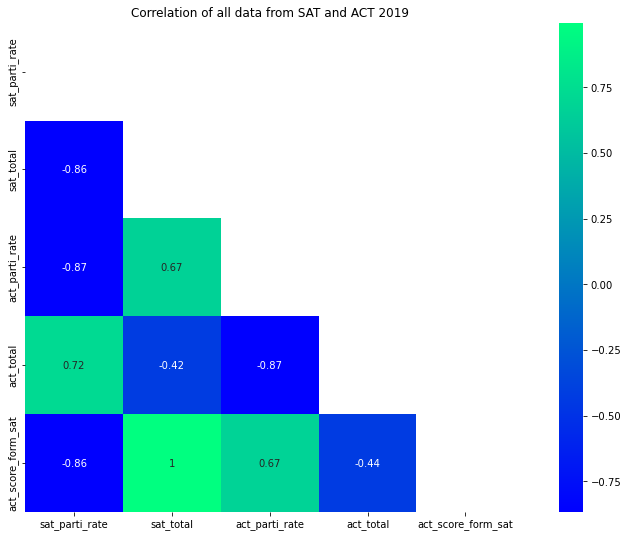

In [118]:
# fix size of chart 
plt.figure(figsize = (16,9))
plt.title('Correlation of all data from SAT and ACT 2019')

# Get correlation of variables.
corr_df_sat_act_2019 = df_sat_act_2019.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_df_sat_act_2019)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap
# This cuts off all the duplicates because this is symmetric
sns.heatmap(corr_df_sat_act_2019,
                    mask = mask,
                    square = True,
                    cmap = 'winter',
                    annot = True);


#### Observations:
It can be seen that the SAT total and ACT Equivalent of SAT score have an exact correlation because that convert from the conversion chart. SAT participation rate is highly correlated to ACT composite and ACT participation rate is highly correlated to SAT total. On the other hand, SAT participation rate is highly negatively correlated to SAT total, as is ACT participation to ACT composite.

## Heatmap SAT and ACT College

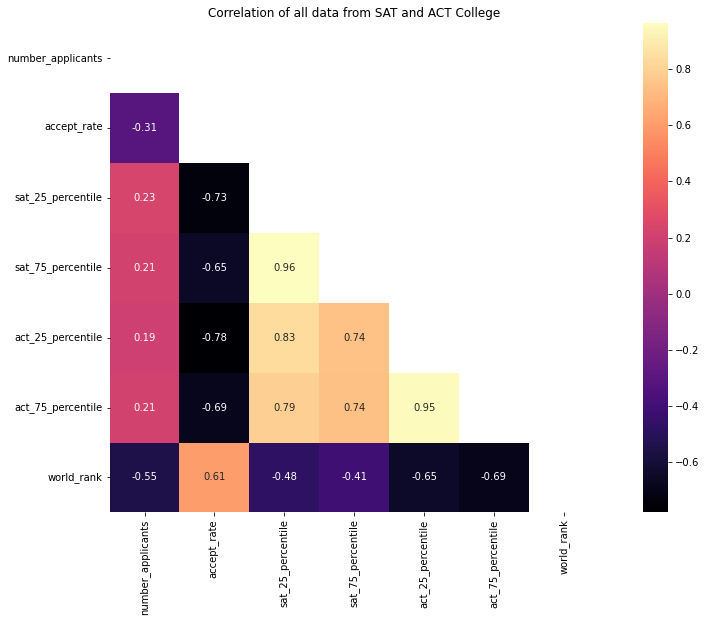

In [119]:
# fix size of chart 
plt.figure(figsize = (16,9))
plt.title('Correlation of all data from SAT and ACT College')

# Get correlation of variables.
corr_df_sat_act_by_college = df_sat_act_by_college.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_df_sat_act_by_college)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap
# This cuts off all the duplicates because this is symmetric
sns.heatmap(corr_df_sat_act_by_college,
                    mask = mask,
                    square = True,
                    cmap = 'magma',
                    annot = True);

#### Observations:
The figure shows that there is not much relationship. each other in each variable. Some of the correlated variables were related in terms of scores, indicating that SAT and ACT scores at college admissions were related and that the admissions rate was related to world rank.

## Histograms

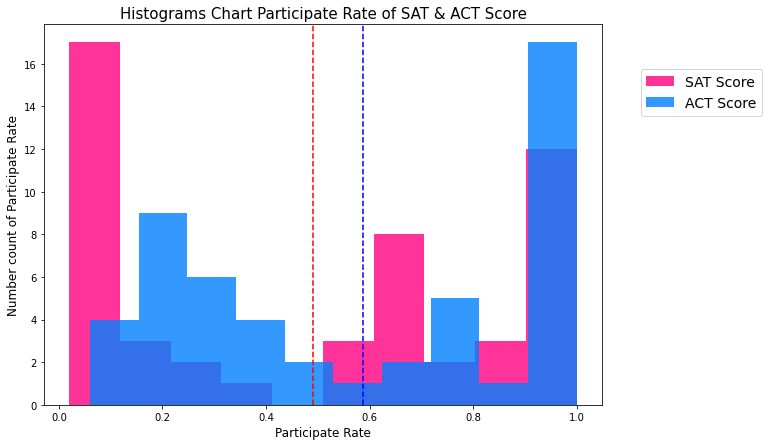

In [120]:
# Create histogram for creating SAT & ACT Participation Rates in 2019

fig = plt.figure(figsize = (10,7))

plt.hist(df_sat_act_2019['sat_parti_rate'], alpha=0.8,color = '#ff0080', label='SAT Score');
plt.axvline(x = np.mean(df_sat_act_2019['sat_parti_rate']),color = 'r',linestyle= "--")


plt.hist(df_sat_act_2019["act_parti_rate"], alpha=0.8,color = '#0080ff' , label='ACT Score');
plt.axvline(x = np.mean(df_sat_act_2019['act_parti_rate']),color = 'b',linestyle= "--" )

plt.legend(bbox_to_anchor=(1.3, .90), loc='upper right', prop={'size': 14})
plt.xlabel('Participate Rate', size = 12)
plt.ylabel('Number count of Participate Rate', size = 12)
plt.title('Histograms Chart Participate Rate of SAT & ACT Score', size = 15)
plt.show()

#### Observations:
For the SAT, there are less states that have 100% participation rate and even more states that have a lower participation rate. The opposite is true for the ACT.

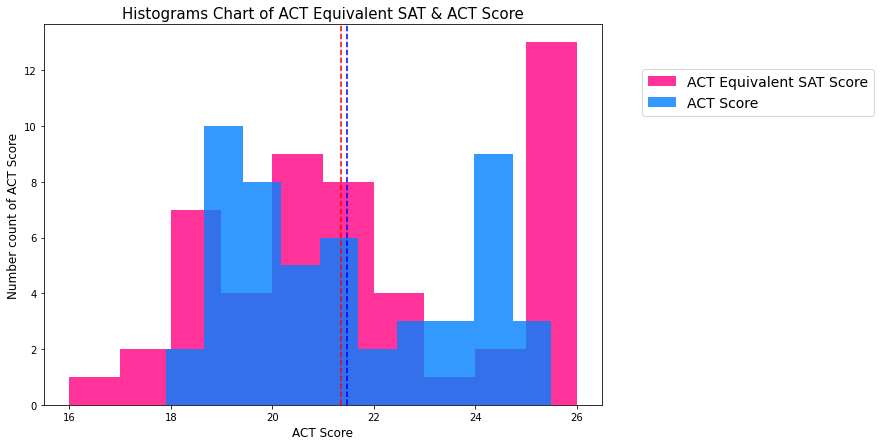

In [121]:
# Create histogram for creating SAT & ACT Score in 2019
fig = plt.figure(figsize = (10,7))


plt.hist(df_sat_act_2019["act_score_form_sat"],alpha=0.8,color = '#ff0080', label='ACT Equivalent SAT Score');
plt.axvline(x = np.mean(df_sat_act_2019['act_score_form_sat']),color = 'r',linestyle= "--")


plt.hist(df_sat_act_2019['act_total'], alpha=0.8,color = '#0080ff', label='ACT Score');
plt.axvline(x = np.mean(df_sat_act_2019['act_total']),color = 'b',linestyle= "--" )


plt.legend(bbox_to_anchor=(1.5, .90), loc='upper right', prop={'size': 14})
plt.xlabel('ACT Score', size = 12)
plt.ylabel('Number count of ACT Score', size = 12)
plt.title('Histograms Chart of ACT Equivalent SAT & ACT Score', size = 15)
plt.show()

#### Observations:
The ACT scores graph distribution is less than the SAT scores(ACT Equivalent SAT Score). Moreover the value of the highest SAT scores(ACT Equivalent SAT Score) is also greater than the ACT scores.

## Barplot

In [122]:
# Sorted value 15 top world rank and save in new variable for make array
sort_university_rank15 = df_sat_act_by_college.sort_values("world_rank",ascending = True)\
                        .head(n=12).sort_values("world_rank",ascending= False) 

In [123]:
# Recheck
sort_university_rank15

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
24,University of California—​Los Angeles,Yes,The UC system has adopted a two-year test opti...,111322,0.123,1290.0,1510.0,27.0,34.0,15.0
10,University of Pennsylvania,Yes,UPenn has adopted a one-year test optional pol...,44961,0.077,1450.0,1560.0,33.0,35.0,14.0
5,California Institute of Technology,Yes (TB),CalTech has adopted a two-year Test Blind poli...,8367,0.064,1530.0,1560.0,35.0,36.0,12.0
4,Yale University,Yes,Yale has adopted a one-year test optional poli...,36844,0.061,1460.0,1570.0,33.0,35.0,11.0
19,Cornell University,Yes,Cornell has adopted a one-year test optional p...,49114,0.109,1400.0,1560.0,32.0,35.0,10.0
2,Princeton University,Yes,Princeton has adopted a one-year test optional...,35370,0.055,1440.0,1570.0,32.0,35.0,9.0
8,University of Chicago,Yes,UChicago offers a test optional policy which a...,32283,0.073,1490.0,1570.0,33.0,35.0,8.0
33,University of California—​Berkeley,Yes (TB),Cal has adopted a four-year test blind policy ...,89621,0.148,1300.0,1530.0,28.0,34.0,7.0
3,Columbia University,Yes,Columbia has adopted a one-year test optional ...,40203,0.055,1450.0,1560.0,33.0,35.0,6.0
6,Massachusetts Institute of Technology,Yes,MIT has adopted a one-year test optional polic...,21706,0.067,1500.0,1570.0,34.0,36.0,3.0


In [124]:
# Create variable for plot bar graph SAT 25th to 75th percentile 15 Top Ranking
array_university = (sort_university_rank15['university']).array
array_world_rank = (sort_university_rank15['world_rank']).array
array_accept_rate_rank = (sort_university_rank15['accept_rate']).array
array_25_sat = (sort_university_rank15['sat_25_percentile']).array
array_75_sat = (sort_university_rank15['sat_75_percentile']).array

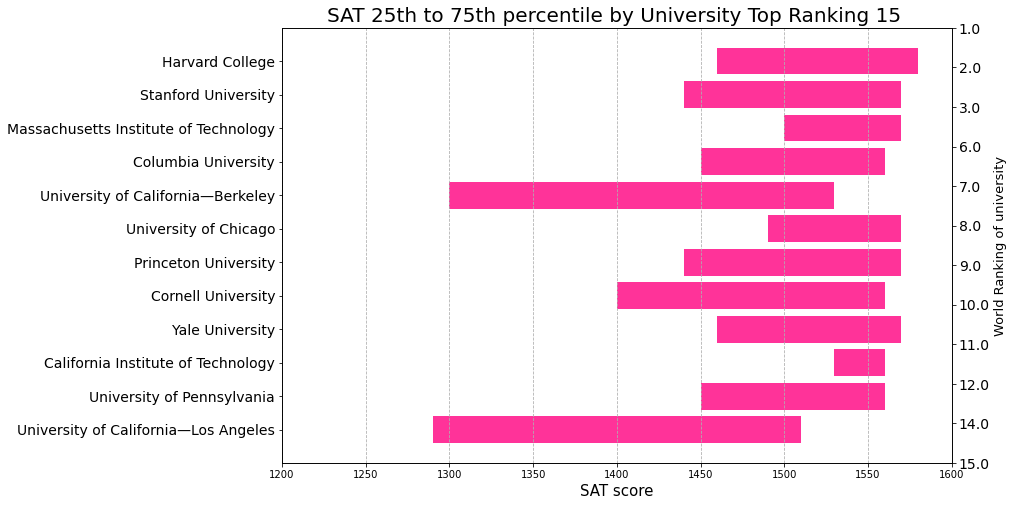

In [125]:
# Create bar graph SAT 25th to 75th percentile 15 Top Ranking 
fig,ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(range(len(array_75_sat)),\
         width=[h-b for h, b in zip(array_75_sat, array_25_sat)],\
        left=array_25_sat, align='center', alpha=0.8, color = '#ff0080')

# Create for plot y twin axis
ax2=ax1.twinx()
ax1.set_yticks(range(len(array_university)), array_university, size=14)
ax2.set_yticks(range(len(array_world_rank)), array_world_rank, size=14)

# Add element
ax1.set_xlabel("SAT score", size=15,)
ax2.set_ylabel("World Ranking of university", size=13,)
ax1.set_title("SAT 25th to 75th percentile by University Top Ranking 15 ", size=20)
ax1.set_xlim([1200, 1600])
ax1.grid(linestyle='--',axis='x')
plt.show()

In [126]:
# Create variable for plot bar graph ACT 25th to 75th percentile 15 Top Ranking 
array_25_act = (sort_university_rank15['act_25_percentile']).array
array_75_act = (sort_university_rank15['act_75_percentile']).array

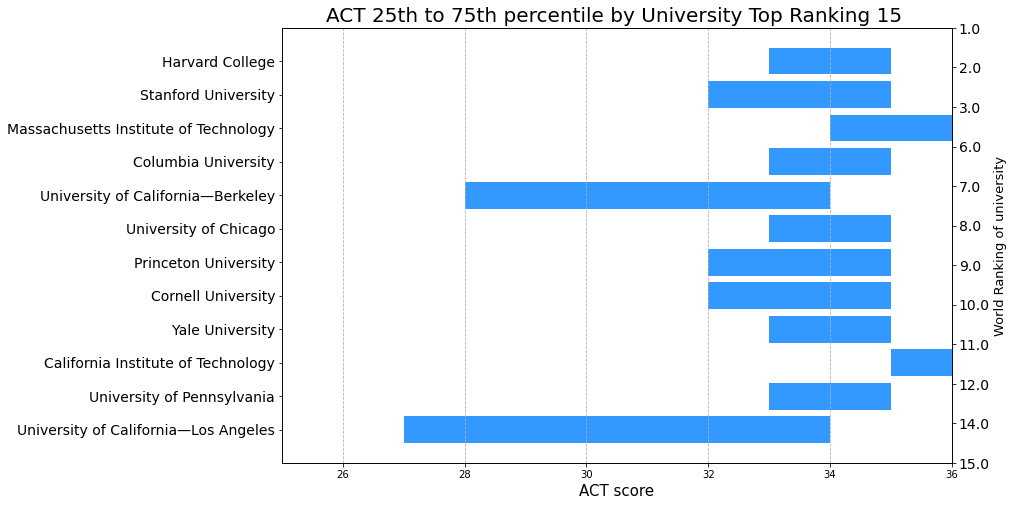

In [127]:
# Create bar graph ACT 25th to 75th percentile 15 Top Ranking 
fig,ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(range(len(array_75_sat)),\
         width=[h-b for h, b in zip(array_75_act, array_25_act)],\
        left=array_25_act, align='center', alpha=0.8, color = '#0080ff')

# Create for plot y twin axis
ax2=ax1.twinx()
ax1.set_yticks(range(len(array_university)), array_university, size=14)
ax2.set_yticks(range(len(array_world_rank)), array_world_rank, size=14)

# Add element
ax1.set_xlabel("ACT score", size=15,)
ax2.set_ylabel("World Ranking of university", size=13,)
ax1.set_title("ACT 25th to 75th percentile by University Top Ranking 15 ", size=20)
ax1.set_xlim([25, 36])
ax1.grid(linestyle='--',axis='x')
plt.show()

#### Observations:
Based on the graph of the top 15 universities worldwide. As we can see,the range 25th-75th percentile of ACT scores are distributed between the significantly more than the range 25th-75th percentile of SAT scores and approach the max score.

In [128]:
# Sorted value accept_rate more than 90% and save in new variable for make array
# Without sat_25_percentile and sat_75_percentile == 0
sort_university_accept_sat = df_sat_act_by_college[df_sat_act_by_college['sat_25_percentile'] != 0].sort_values("accept_rate",ascending = False)\
                            .head(n=14).sort_values("accept_rate",ascending = True)

In [129]:
# Recheck
sort_university_accept_sat.head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
368,University of Maine,Yes,University of Maine has adopted a two-year tes...,13118,0.902,1050.0,1260.0,21.0,27.0,NaN
369,Humboldt State University,Yes (TB),The Cal State system has adopted a one-year te...,16335,0.909,980.0,1190.0,17.0,25.0,NaN
370,Utah State,Yes,Utah State has adopted a one-year test optiona...,15276,0.910,1050.0,1310.0,21.0,28.0,NaN
371,Iowa State University,Yes,Iowa State University has adopted a one-year t...,18246,0.921,1100.0,1340.0,22.0,28.0,187.0
372,Washington College,Yes,Ursinus College has a test-optional policy whi...,2225,0.924,1090.0,1300.0,20.0,29.0,NaN


In [130]:
# Create variable for plot bar graph SAT 25th to 75th percentile at accept rate > 90%
array_university_accept_sat = (sort_university_accept_sat['university']).array
array_25_sat_accept = (sort_university_accept_sat['sat_25_percentile']).array
array_75_sat_accept = (sort_university_accept_sat['sat_75_percentile']).array

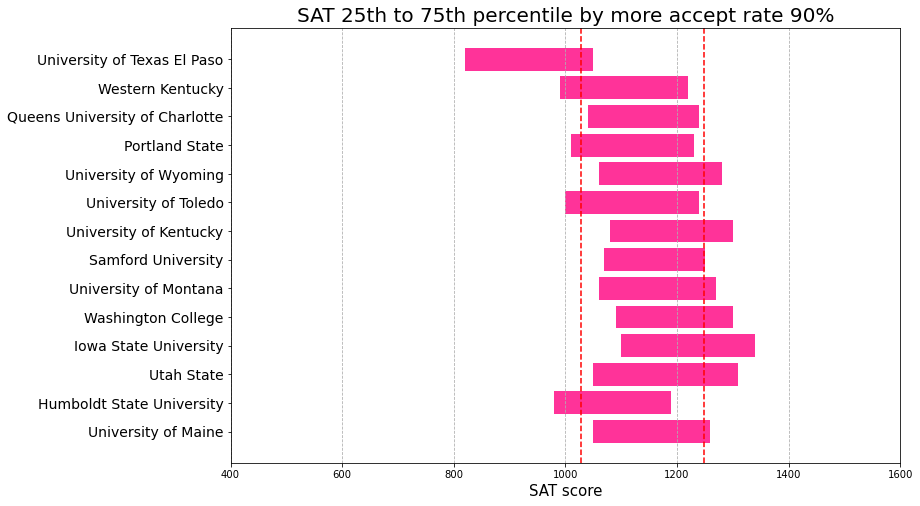

In [131]:
# Create bar graph SAT 25th to 75th percentile at acceot rate > 90%
fig,ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(range(len(array_75_sat_accept)),\
         width=[h-b for h, b in zip(array_75_sat_accept, array_25_sat_accept)],\
        left=array_25_sat_accept, align='center', alpha=0.8, color = '#ff0080')

# y axis 
ax1.set_yticks(range(len(array_university_accept_sat)), array_university_accept_sat, size=14)
ax1.set_xlabel("SAT score", size=15,)

# Plot mean lines
ax1.axvline(x = array_25_sat_accept.mean() ,color = 'r',linestyle= "--" )
ax1.axvline(x = array_75_sat_accept.mean() ,color = 'r',linestyle= "--" )

# Add element
ax1.set_title("SAT 25th to 75th percentile by more accept rate 90%", size=20)
ax1.set_xlim([400, 1600])
ax1.grid(linestyle='--',axis='x')
plt.show()

In [132]:
# Sorted value accept_rate more than 90% and save in new variable for make array 
sort_university_accept_act = df_sat_act_by_college.sort_values("accept_rate",ascending = False)\
                                .head(n=12).sort_values("accept_rate",ascending= True) 

In [133]:
# Recheck
sort_university_accept_act.head()

,university,test_optional,policy_details,number_applicants,accept_rate,sat_25_percentile,sat_75_percentile,act_25_percentile,act_75_percentile,world_rank
372,Washington College,Yes,Ursinus College has a test-optional policy whi...,2225,0.924,1090.0,1300.0,20.0,29.0,NaN
373,University of Montana,Yes,University of Montana has adopted a one-year t...,6182,0.926,1060.0,1270.0,21.0,26.0,NaN
374,Samford University,Yes,Samford University has adopted a one-year test...,3912,0.929,1070.0,1250.0,23.0,29.0,NaN
375,University of Kansas,Yes*,The University of Kansas requires either the S...,15093,0.931,0.0,0.0,23.0,29.0,196.0
376,University of Kentucky,Yes,The University of Kentucky has adopted a one-y...,19324,0.945,1080.0,1300.0,23.0,29.0,267.0


In [134]:
# Create variable for plot bar graph ACT 25th to 75th percentile at acceot rate > 90%
array_university_accept_act = (sort_university_accept_act['university']).array
array_world_range_act = (sort_university_accept_act['world_rank']).array
array_25_act_accept = (sort_university_accept_act['act_25_percentile']).array
array_75_act_accept = (sort_university_accept_act['act_75_percentile']).array

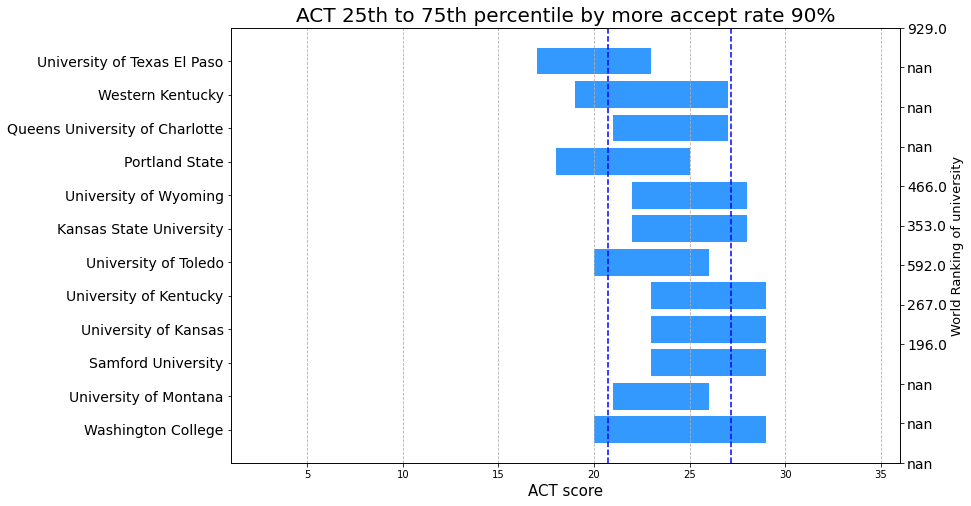

In [135]:
# Create bar graph ACT 25th to 75th percentile at acceot rate > 90%
fig,ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(range(len(array_75_act_accept)),\
         width=[h-b for h, b in zip(array_75_act_accept, array_25_act_accept)],\
        left=array_25_act_accept, align='center', alpha=0.8, color = '#0080ff')

# Create for plot y twin axis
ax2=ax1.twinx()
ax1.set_yticks(range(len(array_university_accept_act)), array_university_accept_act, size=14)
ax2.set_yticks(range(len(array_world_range_act)), array_world_range_act, size=14)

# Plot mean lines
ax1.axvline(x = array_25_act_accept.mean() ,color = 'b',linestyle= "--" )
ax1.axvline(x = array_75_act_accept.mean() ,color = 'b',linestyle= "--" )

# Add element 
ax1.set_xlabel("ACT score", size=15,)
ax2.set_ylabel("World Ranking of university", size=13,)
ax1.set_title("ACT 25th to 75th percentile by more accept rate 90%", size=20)
ax1.set_xlim([1, 36])
ax1.grid(linestyle='--',axis='x')
plt.show()

#### Observations:
In comparison to the SAT score 25th-75th percentile accept rate more 90 percent graph, the ACT score 25th-75th percentile accept rate more 90 percent graph shows a greater distribution of scores towards full scores. Additionally, the ACT score has the ranking of a good university, like University of Kansas(#196), University of Kentucky(#267) and Kansas State University(#353).

## Conclusions and Recommendations

According to the mentioned insights, it can be concluded that ACT score was more popular among students for their entrance exam than SAT score corresponding to the participation rate. Moreover, the distribution of ACT score tends to be compact while SAT score tends to have an outstanding score.

Then, the test scores were investigated in different universities including top 15 universities and other universities. The world top 15 universities appeared to require high score of ACT test comparing to SAT test. Therefore, if the students have a short preparation time, it is better to choose SAT test due to their lower score. However, ACT score was more effective for entering top 100 universities when focusing on accept rate more than 90%. In contrast, SAT score did not have any impacts on top 100 universities entrance.

Therefore, ACT score should be more focus when student's target was top rank universities. But if the rank of universities was not concerned, the students can choose SAT score for their entrance exam.